<br>

# Técnicas Matemáticas para Big Data - Project 2
<br><br>


GROUP 5:
- João Ferreira - Nº 106078 - 33.33% Work Participation
- Ahmed Aziz Bousbih - Nº 130153 - 33.33% Work Participation
- Student 3 - Nº xxxxx - ??% Work Participation

<br><br>

## 1. Introduction to the problem of study [1,0 valor]

### 1. Introduction to the Problem of Study

Financial markets do not behave in a constant or predictable way. Instead, they move through periods of relative stability, where price changes are small, and periods of stronger turbulence, marked by sudden and irregular movements. These different phases are commonly known as volatility regimes. Identifying such regimes is important for understanding market behaviour and for practical tasks such as risk assessment and investment decisions.

One of the main challenges is that volatility regimes are not directly observable. Historical financial data usually provides daily prices, volumes, and returns, but there is no variable indicating whether the market was operating in a low-volatility phase, a transitional situation, or a period of extreme instability. The true state of the market is hidden, while only the resulting price movements can be measured.

This work focuses on addressing this problem by analysing daily log-returns of a financial asset using a Hidden Markov Model (HMM). An HMM is a probabilistic model designed to infer unobserved states from observed data. In this context, we assume that the market can be in one of three states—**low volatility**, **moderate volatility**, or **extreme volatility**, each one associated with different returns.

The main goal of this study is to estimate how these hidden regimes evolve over time, to describe their properties, and to evaluate how effectively an HMM can detect transitions between them.

<br><br>
## 2. Brief and general description of the approach and methods used [1,5 valor]

The aim of this project is to analyse the volatility behaviour of NVIDIA Corporation (NVDA) through a statistical model capable of identifying hidden market regimes. To achieve this, the approach is based on the use of a Hidden Markov Model (HMM) applied to the daily log-returns of NVIDIA’s stock prices. The HMM framework is particularly suitable for this task, as it assumes that the observed data are generated by an unobserved sequence of latent states, each representing a different volatility regime.

The methodology begins by collecting historical daily price data for NVIDIA from Yahoo Finance. From these prices, daily log-returns are computed, as they provide a more stable and statistically convenient representation of market fluctuations. These returns serve as the observable input to the HMM.

The model considered in this study assumes the existence of three latent regimes: **low volatility**, **moderate volatility**, and **extreme volatility**. Each regime is characterised by its own statistical distribution of returns, typically modelled as Gaussian with different variances. The parameters of the HMM — including the means and variances of each regime and the transition probabilities between regimes — are estimated using the Baum–Welch algorithm.

After the model is fitted, the Viterbi algorithm is used to infer the most likely sequence of hidden volatility regimes over time. This allows the analysis of how NVIDIA’s stock transitions between calm periods(low volatility), transitional phases(moderate volatility), and high-turbulence episodes(extreme volatility). The results provide a structured way to interpret the evolution of NVIDIA’s volatility and to identify moments that correspond to significant market events or changes in investor behaviour.

<br><br>
## 3. Brief History and literature review of the problem and methods/algorithms [1,5 valor]

Hidden Markov Models (HMMs) were developed in the late 1960s through the work of Leonard E. Baum and colleagues, who introduced key algorithms such as Forward-Backward(Baum-Welch) method for parameter estimation and the Viterbi algorithm for decoding hidden states.

One of the first applications of HMMs was speech recognition, starting in the mid-1970s. From the linguistics point of view, hidden Markov models are equivalent to stochastic regular grammar.

In the 1990s, HMMs became popular in finance to model regime-switching behaviour in time series. Traditional linear models were insufficient to capture the frequent structural breaks and changing volatility observed in stock prices, interest rates, and exchange rates. HMMs offered a natural framework for representing these dynamics, where different market regimes (such as bull markets, bear markets, or high/low volatility periods) correspond to distinct hidden states.

Hamilton (1989) introduced regime-switching models that allow economic time series to exhibit different behaviours in different states, which closely relate to the HMM framework. Subsequent studies demonstrated that HMMs could effectively capture volatility clustering, fat tails, and other stylized facts of financial returns. By explicitly modelling unobservable market states, HMMs enable more accurate forecasting and risk assessment.

Nowaday, HMMs continue to play a key role in both research and real-word applications. Their capacity to uncover hidden patterns from noisy data makes them especially valuable in context where financial information is becoming increasingly complex and high-dimensional.

<br><br>
## 4. About the main method/algorithm used [1,5 valor]

### Hidden Markov Models: Core Concepts

A Hidden Markov Model is a statistical model that represents a system assumed to be a Markov process with unobserved (hidden) states. The model consists of two main components:

1. **Hidden States**: A sequence of latent states $X_1, X_2, \ldots, X_T$ that evolve over time according to a Markov property—the probability of transitioning to a new state depends only on the current state, not on past states.

2. **Observations**: A sequence of observable outputs $Y_1, Y_2, \ldots, Y_T$ where each observation is generated by the current hidden state according to an **emission probability distribution**.

### Key Components of an HMM

An HMM is fully specified by the following parameters:

- **States**: A finite set of $N$ hidden states ${x_1, x_2, \ldots, x_N}$
- **Initial State Distribution** $\pi$: The probability distribution over states at time $t=0$
- **Transition Matrix** $A$: An $N \times N$ matrix where $a_{ij}$ represents the probability of transitioning from state $i$ to state $j$
- **Emission Probabilities** $B$: The probability distributions that govern how observations are generated from each state

### The Three Fundamental Problems

HMMs address three fundamental computational problems:

**1. Evaluation Problem (Forward Algorithm)**  
For a given model and a sequence of observations, the goal is to determine how likely is to obtain that sequence. it uses dynamic programming to aggregate probabilities over time.

**2. Decoding Problem (Viterbi Algorithm)**  
The objective is to recover the sequence of hidden states that best explains the observed data. The Viterbi algorithm computes this by finding the path with the highest probability, again relying in dynamic programming.

**3. Learning Problem (Baum-Welch Algorithm)**  
Given only observations, estimate the model parameters that maximize the likelihood of the data. The Baum-Welch algorithm is an Expectation-Maximization (EM) algorithm that iteratively refines parameter estimates:
- **E-step**: Compute expected state occupancies and transitions given current parameters
- **M-step**: Update parameters to maximize likelihood given these expectations

### Application to Financial Volatility

In financial applications, we model:
- **Hidden states**: Different volatility regimes (low, moderate, extreme)
- **Observations**: Daily log-returns of stock prices
- **Emission distributions**: Gaussian distributions with different means and variances for each regime

The transition matrix captures the tendency of markets to persist in a regime or switch between regimes. By estimating these parameters from historical data, we can:
- Identify which regime the market was in at any point in time
- Predict future regime transitions
- Assess the risk profile of different market periods

### Computational Complexity

The algorithms scale as follows:
- **Forward/Backward**: $O(N^2 T)$ where $N$ is the number of states and $T$ is the sequence length
- **Viterbi**: $O(N^2 T)$
- **Baum-Welch**: $O(I \cdot N^2 T)$ where $I$ is the number of iterations

This makes HMMs computationally efficient even for long time series with moderate numbers of states.

<br><br>

## 5. Python imports and global configurations [0,5 valor]

### Install and import the necessary libraries to compute the Bayesian Network and perform other methods  

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn.hmm import GaussianHMM

<br><br>

## 6. Dataset and variables explanation [1,5 valor]

### Data Source and Scope
The dataset used in this study consists of historical daily stock prices for **NVIDIA Corporation (NVDA)**. The data was retrieved using the `yfinance` API, which sources market data directly from Yahoo Finance.

**Timeframe:** January 1, 2010 – January 1, 2024  
This 14-year period was selected to ensure the model captures a wide variety of market conditions, including:
* The post-2008 economic recovery.
* The cryptocurrency mining booms (which heavily impacted GPU demand).
* The COVID-19 pandemic volatility.
* The recent AI-driven surge in valuation.

### Variables Description

The analysis relies on the following key variables:

**1. `Close` (Observed)**
* **Definition:** The final trading price of the stock at the end of each business day.
* **Role:** This is the raw input data. However, raw prices are rarely used directly in HMMs because they are non-stationary (they tend to drift upwards over time rather than fluctuating around a constant mean).

**2. `Log_Returns` (Transformed Observation)**
* **Definition:** The natural logarithm of the ratio between consecutive daily closing prices.
* **Formula:** $$r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)$$
* **Role:** This is the actual variable fed into the Hidden Markov Model.
* **Justification:**
    * **Stationarity:** Unlike prices, returns oscillate around zero, making them statistically stable.
    * **Normality:** Log-returns often approximate a Gaussian (Normal) distribution, satisfying the assumption of the `GaussianHMM`.
    * **Additivity:** Log-returns are time-additive, simplifying multi-period analysis.

**3. `Regime` (Hidden State)**
* **Definition:** A categorical variable inferred by the model (not present in the original data).
* **Role:** Represents the latent state of the market volatility.
* **Values:**
    * **0 (Low Volatility):** Small price changes, stable market.
    * **1 (Moderate Volatility):** Normal market fluctuations.
    * **2 (High Volatility):** Large price swings, typical of crashes or rallies.

In [7]:
ticker = "NVDA"
data = yf.download(ticker, start = "2010-01-01", end = "2024-01-01")

C:\Users\gonca\AppData\Local\Temp\ipykernel_11840\1780672497.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start = "2010-01-01", end = "2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [8]:
data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))
data.dropna(inplace=True)

In [9]:
X = data['Log_Returns'].values.reshape(-1, 1)

In [16]:
# Display the first few rows to visualize the variables
print("Dataset Preview:")
print(data[['Close', 'Log_Returns']].head())

# Display statistical summary
print("\nStatistical Summary of Log-Returns:")
print(data['Log_Returns'].describe())

Dataset Preview:
Price          Close Log_Returns
Ticker          NVDA            
Date                            
2010-01-05  0.430019    0.014497
2010-01-06  0.432770    0.006376
2010-01-07  0.424289   -0.019792
2010-01-08  0.425206    0.002158
2010-01-11  0.419246   -0.014115

Statistical Summary of Log-Returns:
count    3521.000000
mean        0.001352
std         0.028079
min        -0.207712
25%        -0.012229
50%         0.001571
75%         0.015241
max         0.260876
Name: Log_Returns, dtype: float64


<br><br>

## 7. Main code as possible solution to the problem [1,5 valor] 

In [11]:
model = GaussianHMM(n_components=3, covariance_type="diag", n_iter=100, random_state=42)
model.fit(X)

,n_components,3
,covariance_type,'diag'
,min_covar,0.001
,startprob_prior,1.0
,transmat_prior,1.0
,means_prior,0
,means_weight,0
,covars_prior,0.01
,covars_weight,1
,algorithm,'viterbi'
,random_state,42


In [12]:
hidden_states = model.predict(X)
data['Regime'] = hidden_states

In [13]:
volatility_order = np.argsort(model.covars_.flatten())
reordered_states = {old_label: new_label for new_label, old_label in enumerate(volatility_order)}
data['Regime'] = data['Regime'].map(reordered_states)

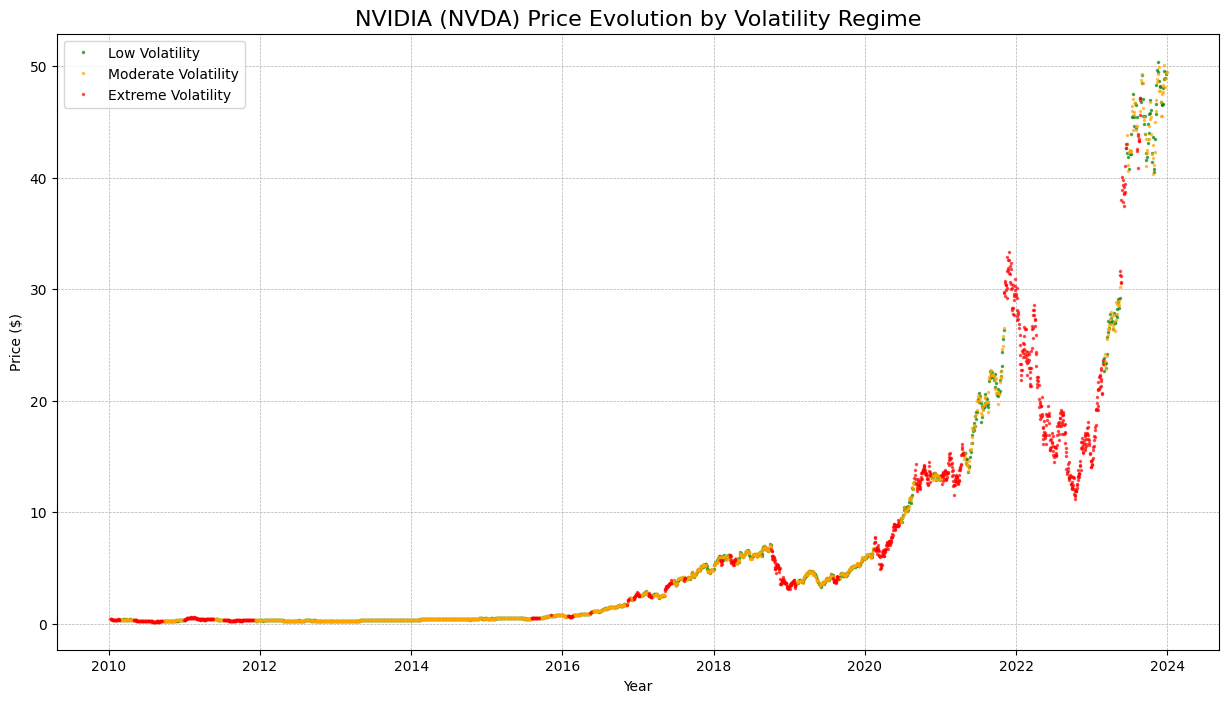

In [14]:
plt.figure(figsize=(15, 8))
colors = ['green', 'orange', 'red'] # Green=Low, Orange=Moderate, Red=High
labels = ['Low Volatility', 'Moderate Volatility', 'Extreme Volatility']

for regime_idx, color in enumerate(colors):
    mask = data['Regime'] == regime_idx
    plt.plot(data.index[mask], data['Close'][mask], '.', markersize=3, 
             color=color, label=labels[regime_idx], alpha=0.6)

plt.title(f"NVIDIA (NVDA) Price Evolution by Volatility Regime", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [15]:
print("Regime Statistics (Means and Variances of Log-Returns):")
for i in range(3):
    print(f"Regime {i} ({labels[i]}):")
    print(f"  Mean Return: {model.means_[volatility_order[i]][0]:.5f}")
    print(f"  Variance: {model.covars_[volatility_order[i]][0][0]:.5f}\n")

Regime Statistics (Means and Variances of Log-Returns):
Regime 0 (Low Volatility):
  Mean Return: 0.00123
  Variance: 0.00021

Regime 1 (Moderate Volatility):
  Mean Return: 0.00245
  Variance: 0.00053

Regime 2 (Extreme Volatility):
  Mean Return: 0.00008
  Variance: 0.00193



<br><br>

## 8. Analysis of Example 1 [3,0 valor]

<br><br>

## 9. Analysis of Example 2 [3,0 valor]

<br><br>
## 10. Pros and cons of the approach [2,0 valor]

<br><br>
## 11. Future improvements [2,0 valor]

<br>
<div style="text-align: center;">
    <br><br>
    <p style="font-size: 40px;">References [1,0 valor]</p>
</div>
<br>


Ishijima, H. & Kihara, T. (2005). Option pricing with Hidden Markov Models. Waseda University, Institute of Finance https://www.waseda.jp/fcom/wbf/assets/uploads/2017/06/wnif05-004.pdf